In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## BattleShip 

### Information

#### Dimensions: 10x10

#### Ships:

#### - Carrier: 5 pegs
#### - Battleship: 4 pegs
#### - Cruiser: 3 pegs
#### - Subamarine: 3 pegs
#### - Destroyer: 2 pegs

In [2]:
ships = {
    "Carrier" : 5,
    "Battleship" : 4,
    "Cruiser" : 3,
    "Submarine" : 3,
    "Destroyer" : 2
}

In [3]:
ship_symbols = {
    "Carrier" : 'C',
    "Battleship" : 'B',
    "Cruiser" : 'CR',
    "Submarine" : 'S',
    "Destroyer" : 'D'
}

In [4]:
def get_coord(input_msg):
    ship_coord = tuple(input(input_msg))
    x = ship_coord[0]
    x = int(x)
    y = ship_coord[1]
    y = int(y)
    return (x, y)

In [5]:
def random_place_ships():
    your_ships = np.zeros((10, 10))
    for ship in ships:
        ship_size = ships[ship]
        right_placements = []
        down_placements = []
        for x in range(10):
            for y in range(10):
                end_d = x + ship_size
                end_r = y + ship_size
                if end_d <= 10 and 2 not in your_ships[:,y][x:end_d]:
                    down_placements.append((x, y))
                if end_r <= 10 and 2 not in your_ships[x][y:end_r]:
                    right_placements.append((x, y))
        if (len(down_placements) > 0 and len(right_placements) > 0):
            d_or_r = random.randint(0, 1)
            if (d_or_r == 1):
                x, y = down_placements[random.randint(0, len(down_placements)- 1)]
                end = x + ship_size
                your_ships[:,y][x:end] = 2
            else:
                x, y = right_placements[random.randint(0, len(right_placements)- 1)]
                end = y + ship_size
                your_ships[x][y:end] = 2
                
    return your_ships

In [6]:
def fire_shot(opponent_ships):
    x, y = get_coord("Take shot")
    if (opponent_ships[x][y] == 2):
        print("HIT")
        opponent_ships[x][y] = 1
        return True
    return False

In [7]:
def get_available_shots(ships):
    shots = []
    for i in range(100):
        x, y = reverse_map(i)
        if (ships[x][y] != 1):
            shots.append(i)
    return shots

In [8]:
def fire_shot_ai(state, epsilon, Q, ships):
    chance = np.random.rand()
    legal_shots = get_available_shots(ships)
    if chance < epsilon:
        return np.random.choice(legal_shots)
    max_action = legal_shots[0]
    for a in legal_shots:
        if Q[state][a] > Q[state][max_action]:
            max_action = a
    return max_action

In [9]:
def over(your_ships, opponent_ships):
    return 2 not in your_ships or 2 not in opponent_ships

In [10]:
def reverse_map(observation):
    return observation//10, observation%10

In [76]:
def q_learning(a, s, e, ships, R, U, Q):
    hit = 0
    x, y = reverse_map(a)
    if (ships[x][y] == 2):
        R[s][a] += 50
        hit = 1
    ships[x][y] = 1
    learning_rate = 1 / (1 + U[s, a])
    Q[s][a] = Q[s][a] + learning_rate * (R[s][a] + gamma * np.max(Q[a]) - Q[s][a])
    U[s][a] += 1
    return hit

In [12]:
def copy_placements(ships):
    copy_ships = np.zeros((10, 10))
    for x in range(10):
        for y in range(10):
            copy_ships[x][y] = ships[x][y]
    return copy_ships

In [94]:
e = 0.9
gamma = 0.9
Q1 = np.zeros((100, 100))
R1 = np.zeros((100, 100))
U1 = np.zeros((100, 100))

Q2 = np.zeros((100, 100))
R2 = np.zeros((100, 100))
U2 = np.zeros((100, 100))

In [17]:
ships1 = random_place_ships()
ships2 = random_place_ships()

In [95]:
rounds = []
for i in range(5000):
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    hits1 = 0
    hits2 = 0
    num_rounds = 0
    your_ships = copy_placements(ships1)
    opponent_ships = copy_placements(ships2)
    while(not over(your_ships, opponent_ships)):
        a1 = fire_shot_ai(s1, e, Q1, your_ships)
        hits1 += q_learning(a1, s1, e, your_ships, R1, U1, Q1)
        s1 = a1
        a2 = fire_shot_ai(s2, e, Q2, opponent_ships)
        hits2 += q_learning(a2, s2, e, opponent_ships, R2, U2, Q2)
        s2 = a2
        e *= 0.9999
        num_rounds += 1
    rounds.append(num_rounds)

In [84]:
e = 0.9
gamma = 0.9
Q = np.zeros((100, 100))
R = np.zeros((100, 100))
U = np.zeros((100, 100))

In [89]:
rounds = []
for i in range(500000):
    s1 = random.randint(0, 99)
    s2 = random.randint(0, 99)
    hits1 = 0
    hits2 = 0
    num_rounds = 0
    your_ships = random_place_ships()
    opponent_ships = random_place_ships()
    while(not over(your_ships, opponent_ships)):
        a1 = fire_shot_ai(s1, e, Q, your_ships)
        hits1 += q_learning(a1, s1, e, your_ships, R, U, Q)
        s1 = a1
        a2 = fire_shot_ai(s2, e, Q, opponent_ships)
        hits2 += q_learning(a2, s2, e, opponent_ships, R, U, Q)
        s2 = a2
        e *= 0.999
        num_rounds += 1
    rounds.append(num_rounds)

Text(0.5, 1.0, 'Average Rounds')

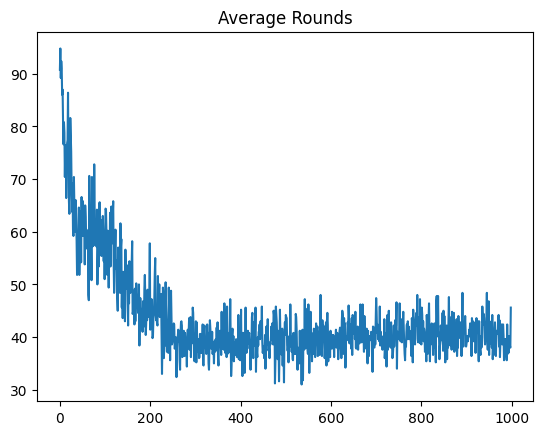

In [99]:
def average_results(results, step):
    average_results = []
    for i in range(len(results)):
        if i % step == 0 and i > 0:
            average_results.append(np.mean(results[i - step:i]))
    return average_results

average_rounds = average_results(rounds, 5)

plt.plot(average_rounds)
plt.title("Average Rounds")